## This code will train a CNN with the MNIST Fashion Dataset and visualize:
## 1) The trained FILTERS uses
## 2) The Feature Map


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [22]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [23]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)



Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5504 - accuracy: 0.8045 - val_loss: 0.3873 - val_accuracy: 0.8654
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3571 - accuracy: 0.8715 - val_loss: 0.3284 - val_accuracy: 0.8834
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3080 - accuracy: 0.8873 - val_loss: 0.3137 - val_accuracy: 0.8865
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2796 - accuracy: 0.8968 - val_loss: 0.3044 - val_accuracy: 0.8880
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2531 - accuracy: 0.9082 - val_loss: 0.2767 - val_accuracy: 0.9016
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2329 - accuracy: 0.9149 - val_loss: 0.2672 - val_accuracy: 0.9032
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2154 - accuracy: 0.9220 - val_loss: 0.2676 - val_accuracy: 0.9053
Epoch 

In [24]:
##########################################################################################################


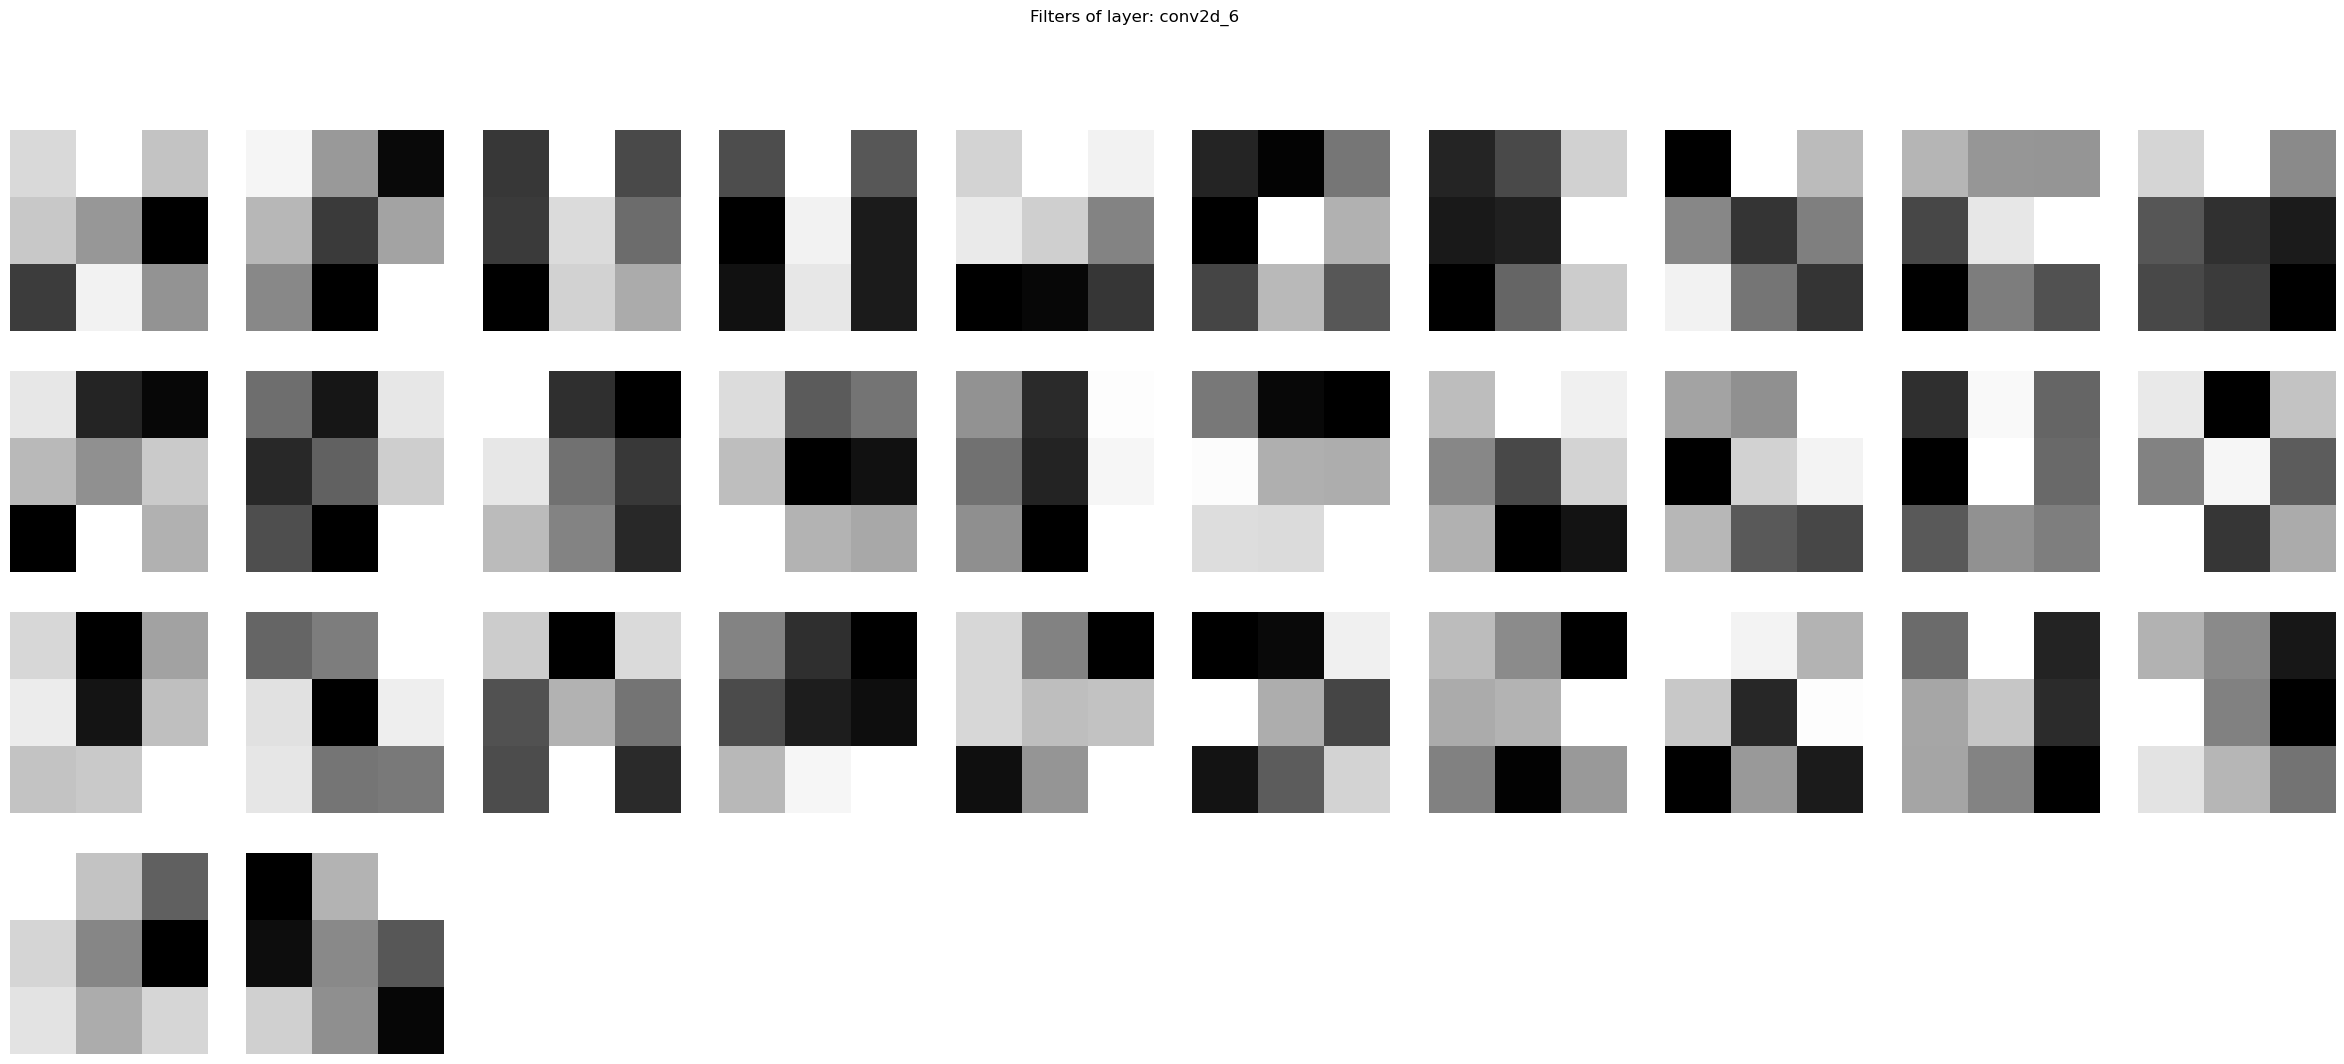

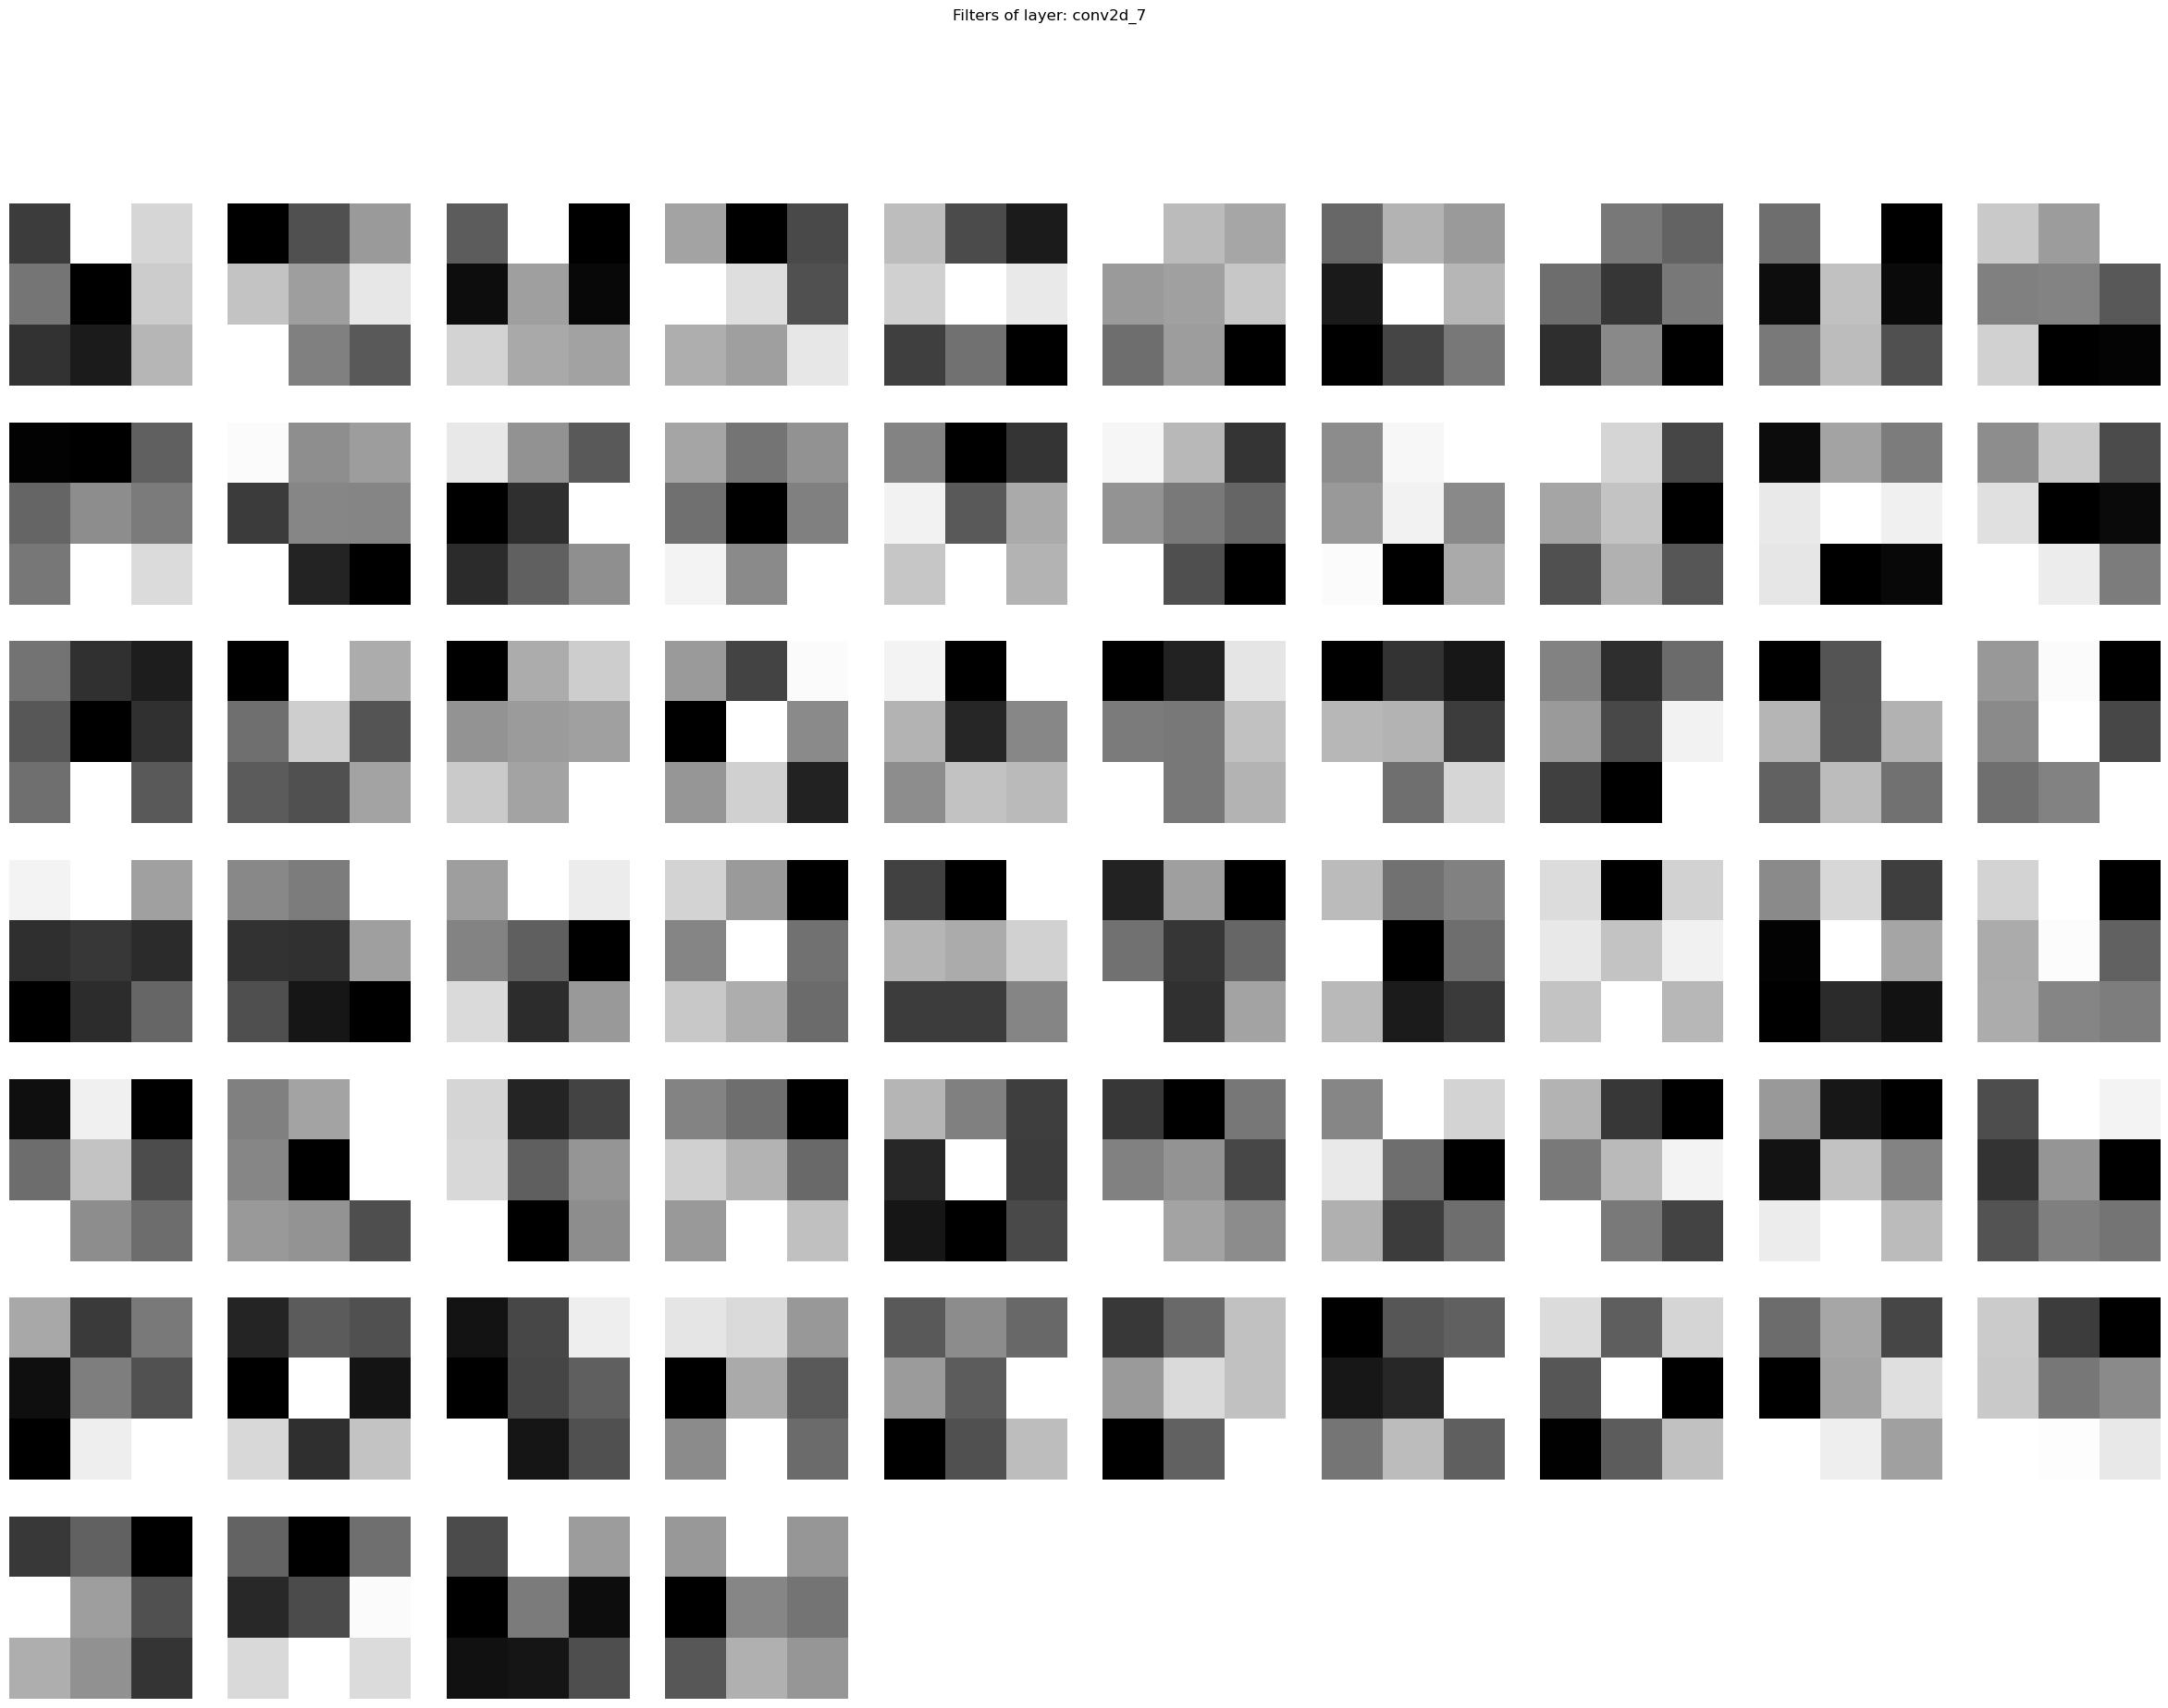

In [28]:
# Visualize the trained filters
def plot_filters(layer, layer_name, filters_per_row=10):
    filters, biases = layer.get_weights()
    n_filters = filters.shape[-1]
    n_columns = filters_per_row
    n_rows = (n_filters // n_columns) + int(n_filters % n_columns != 0)
    fig, axes = plt.subplots(n_rows, n_columns, figsize=(n_columns * 3, n_rows * 3))
    axes = axes.flatten()
    for i in range(n_filters):
        f = filters[:, :, :, i]
        ax = axes[i]
        ax.imshow(f[:, :, 0], cmap='gray', aspect='auto')
        ax.axis('off')
    for i in range(n_filters, len(axes)):
        axes[i].axis('off')
    plt.suptitle(f'Filters of layer: {layer_name}')
    plt.show()

# Get the layers that have filters
conv_layers = [layer for layer in model.layers if 'conv' in layer.name]

for layer in conv_layers:
    plot_filters(layer, layer.name)

1/1 [==============================] - 0s 37ms/step


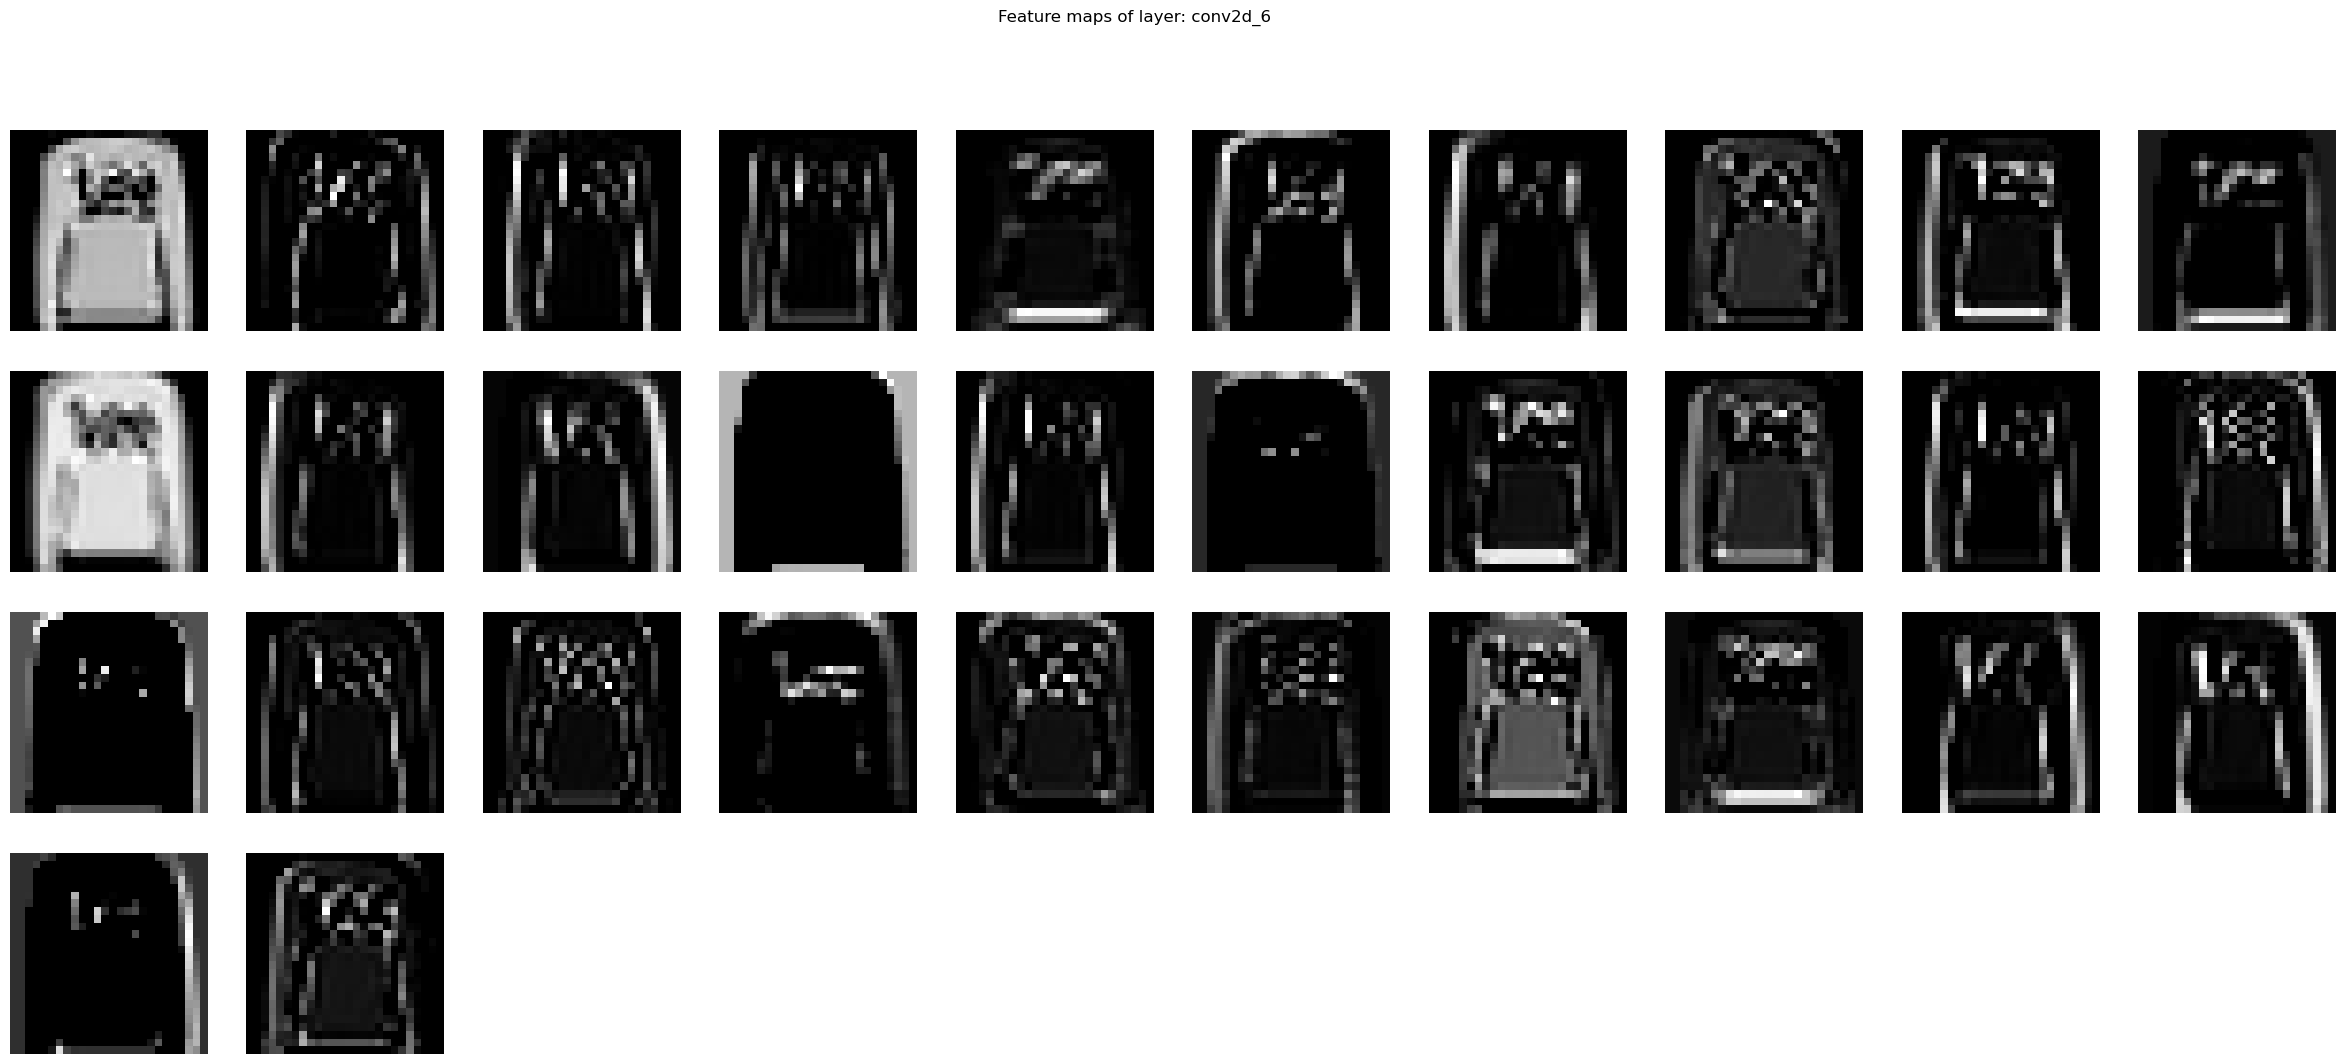

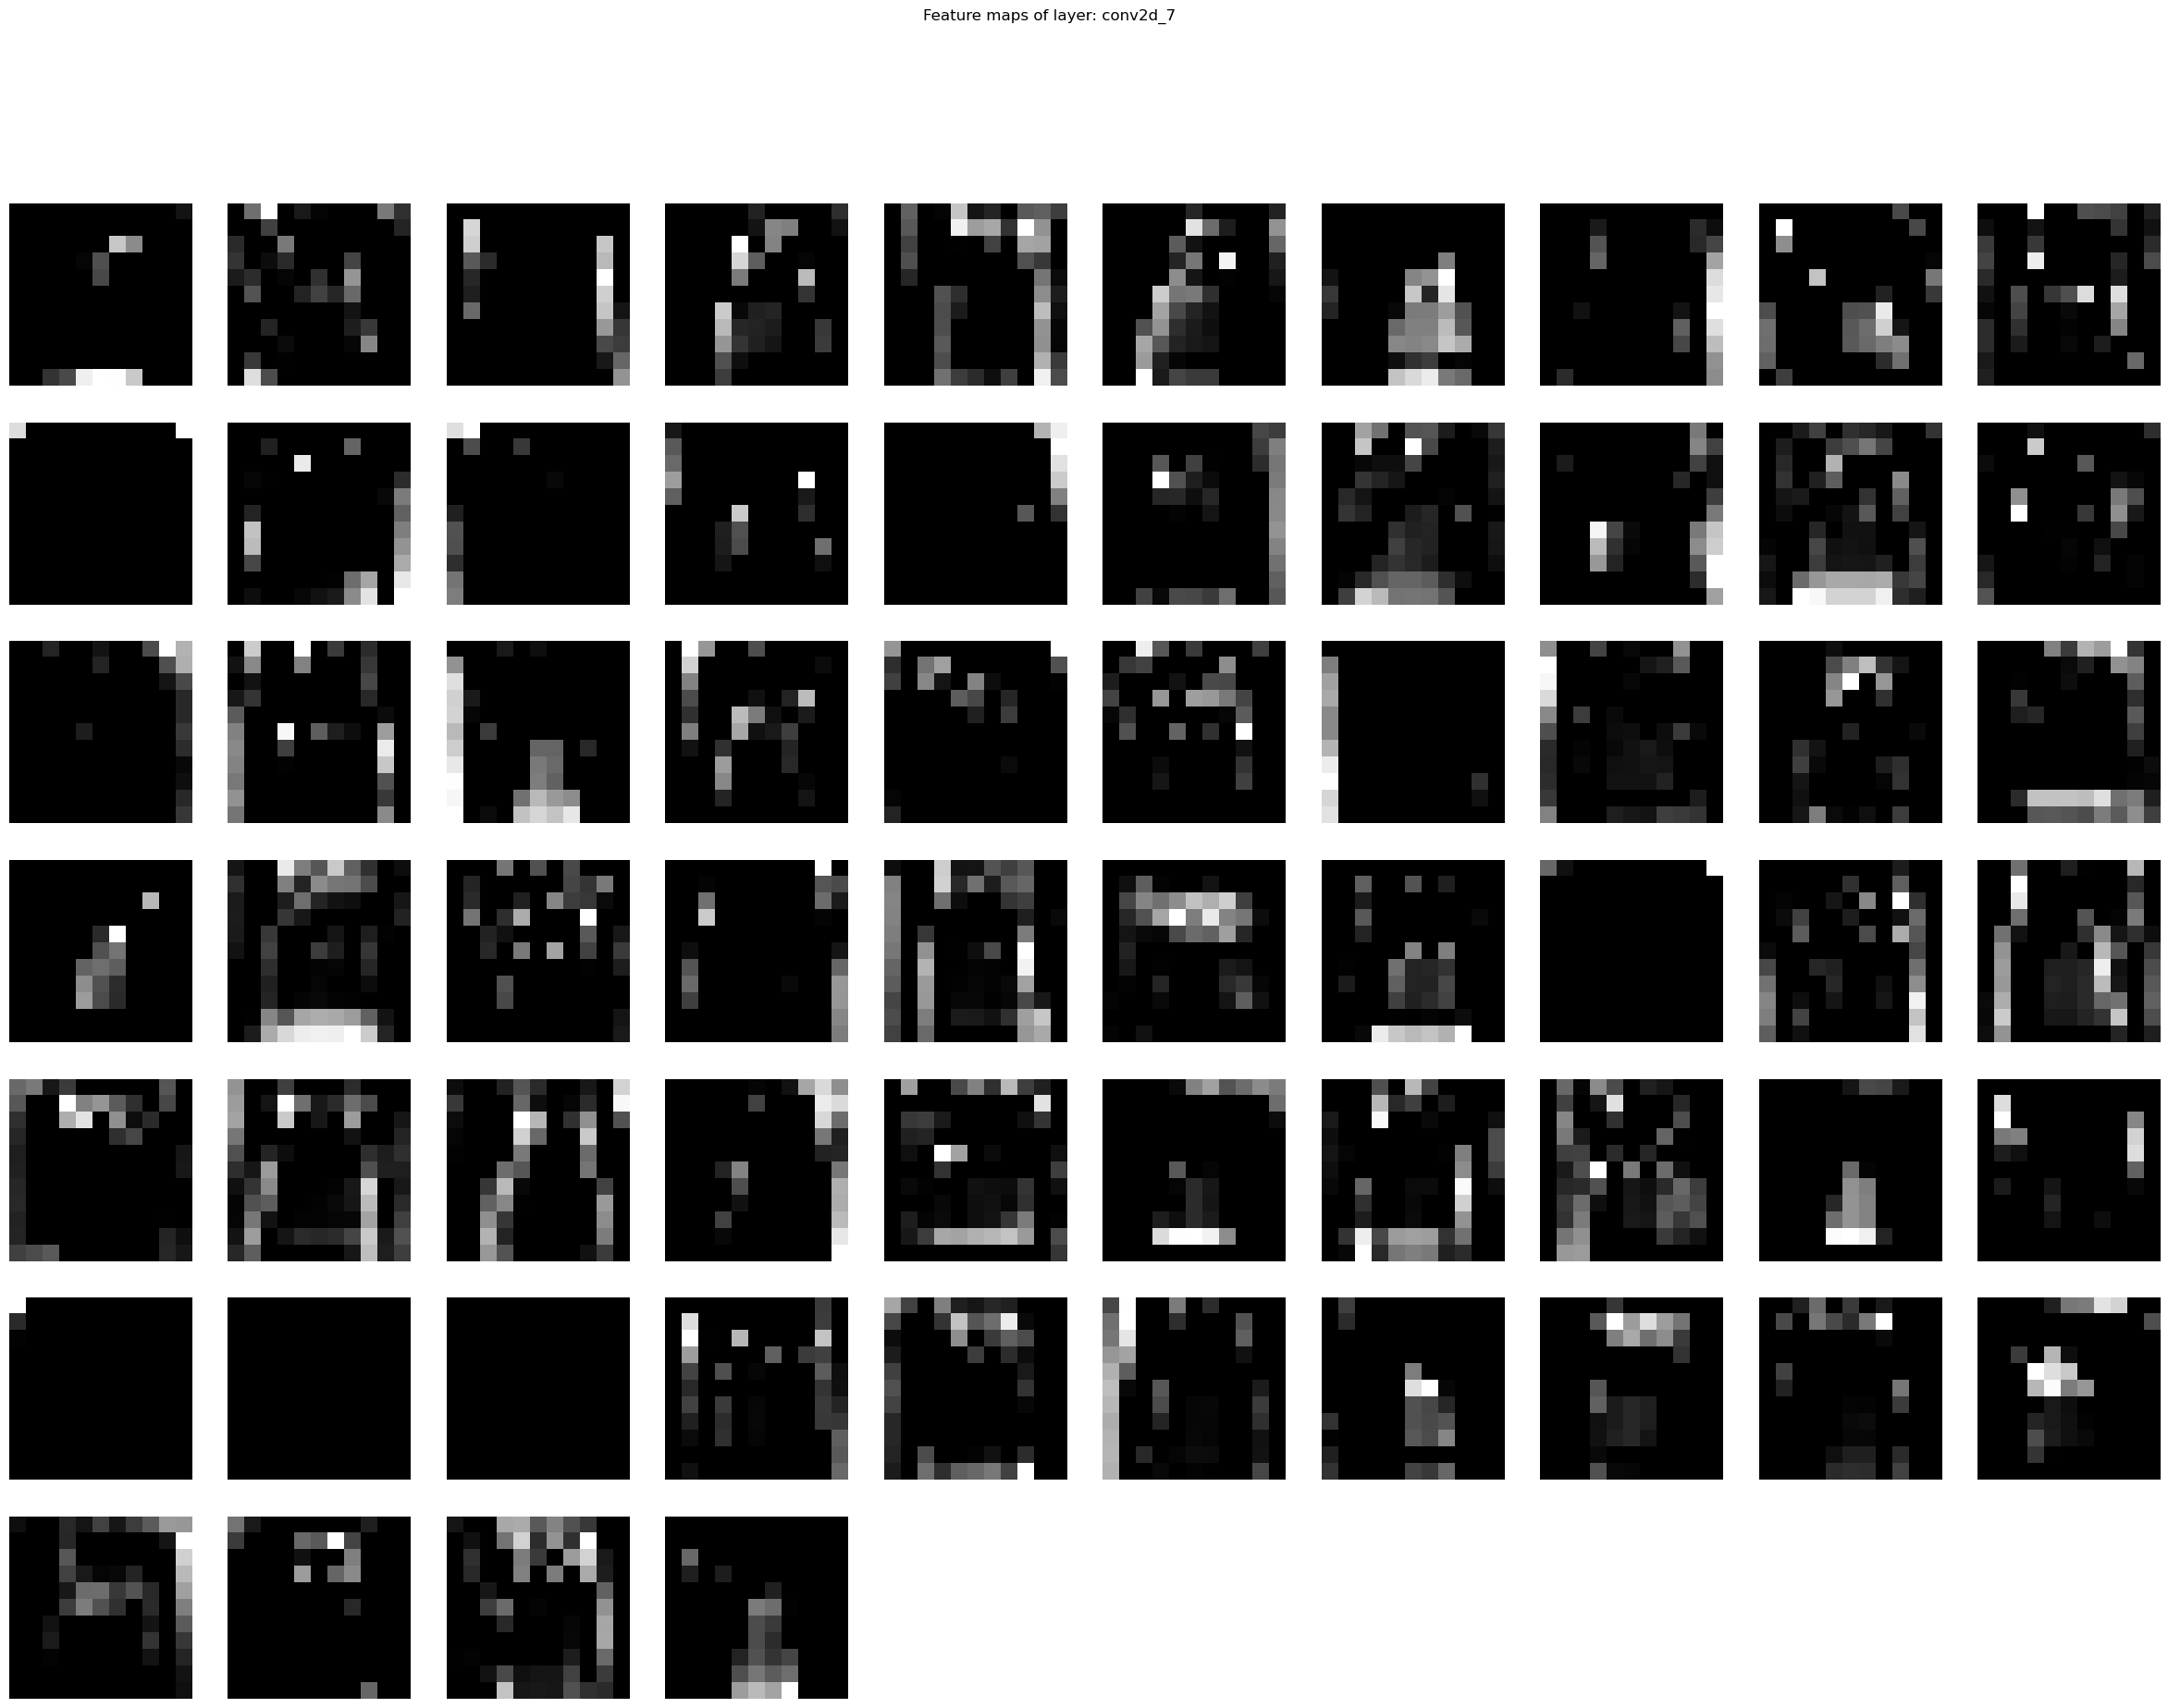

In [29]:
# Plot the feature maps
def plot_feature_maps(model, image, layers_to_plot, features_per_row=10):
    layer_outputs = [layer.output for layer in layers_to_plot]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(image.reshape(1, 28, 28, 1))
    
    for layer_name, activation in zip([layer.name for layer in layers_to_plot], activations):
        n_features = activation.shape[-1]
        n_columns = features_per_row
        n_rows = (n_features // n_columns) + int(n_features % n_columns != 0)
        fig, axes = plt.subplots(n_rows, n_columns, figsize=(n_columns * 3, n_rows * 3))
        axes = axes.flatten()
        for i in range(n_features):
            feature_map = activation[0, :, :, i]
            ax = axes[i]
            ax.imshow(feature_map, cmap='gray', aspect='auto')
            ax.axis('off')
        for i in range(n_features, len(axes)):
            axes[i].axis('off')
        plt.suptitle(f'Feature maps of layer: {layer_name}')
        plt.show()

# Plot the feature maps for the first image in the test set
plot_feature_maps(model, test_images[1], conv_layers)

1/1 [==============================] - 0s 138ms/step


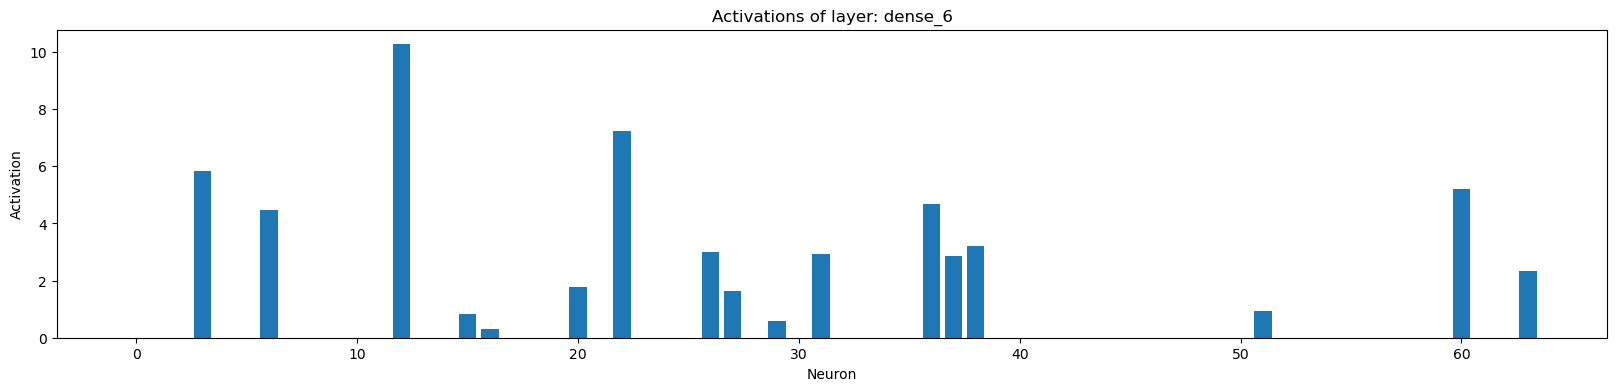

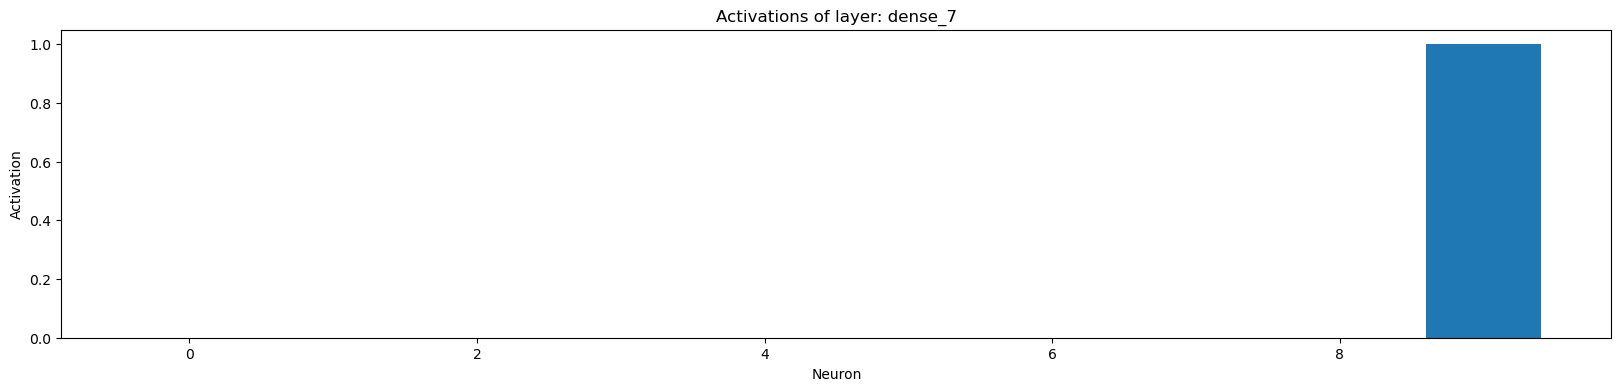

In [30]:
# Function to plot dense layer activations
def plot_dense_activations(model, image, dense_layers):
    layer_outputs = [layer.output for layer in dense_layers]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(image.reshape(1, 28, 28, 1))

    for layer_name, activation in zip([layer.name for layer in dense_layers], activations):
        n_neurons = activation.shape[-1]
        plt.figure(figsize=(20, 4))
        plt.bar(range(n_neurons), activation[0])
        plt.title(f'Activations of layer: {layer_name}')
        plt.xlabel('Neuron')
        plt.ylabel('Activation')
        plt.show()

dense_layers = [layer for layer in model.layers if 'dense' in layer.name]

# Plot the activations of the dense layers for the first image in the test set
plot_dense_activations(model, test_images[0], dense_layers)